### Induwara Senadheera 
### 190574U

### Hough Transforms

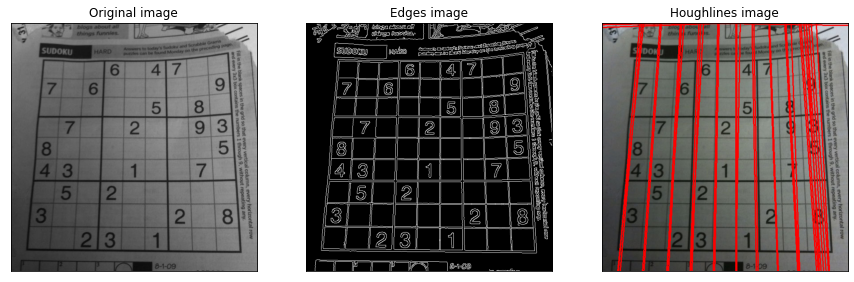

In [1]:
# Question 01
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

im = cv.imread(r'./Images/sudoku.png', cv.IMREAD_COLOR)
assert im is not None
gray = cv.cvtColor( im , cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray,20,120,apertureSize = 3)
lines = cv.HoughLines(edges,1,np.pi/180,175)

for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 , y0 = a*rho , b*rho
    x1, y1 = int(x0 + 1000*(-b)), int(x0 + 1000*(a))
    x2, y2 = int(x0 - 1000*(-b)), int(x0 - 1000*(a))
    cv.line(im,(x1,y1),(x2,y2),(0,0,255),2)

fig, ax = plt.subplots(1,3, figsize = (15,15))
ax[0].imshow(cv.cvtColor(gray, cv.COLOR_BGR2RGB))
ax[0].set_title('Original image')
ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].imshow(cv.cvtColor(edges, cv.COLOR_BGR2RGB))
ax[1].set_title('Edges image')
ax[1].set_xticks([]), ax[1].set_yticks([])
ax[2].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax[2].set_title('Houghlines image')
ax[2].set_xticks([]), ax[2].set_yticks([])
plt.show()



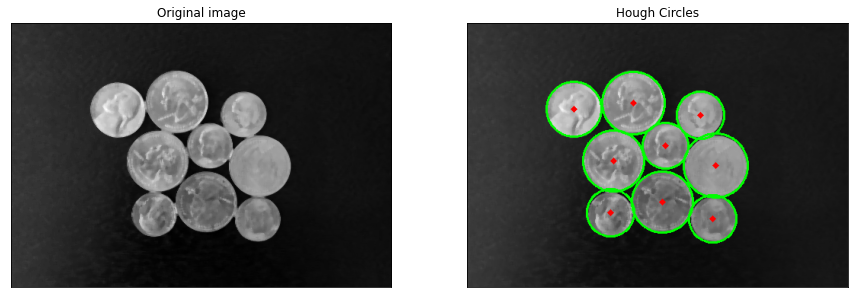

In [1]:
# Question 02
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img = cv.imread(r'.\Images\coins.jpg',0)
img = cv.medianBlur(img,5)
cimg = cv.cvtColor(img,cv.COLOR_GRAY2BGR)
circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,20,
                            param1=150,param2=20,minRadius=30,maxRadius=50)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

fig, ax = plt.subplots(1,2, figsize = (15,15))
ax[0].imshow(img,"gray")
ax[0].set_title('Original image')
ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].imshow(cv.cvtColor(cimg, cv.COLOR_BGR2RGB))
ax[1].set_title('Hough Circles')
ax[1].set_xticks([]), ax[1].set_yticks([])
plt.show()

x=29.0,y=109.0,scale=1.0,orientation = 0.0,p1 = (4, 76), p2 = (54, 141)


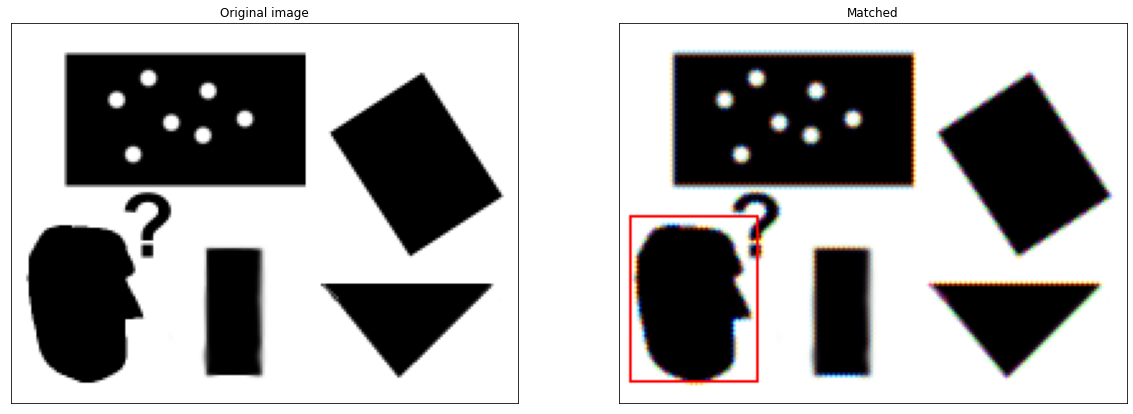

In [3]:
# Question 03
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im = cv.imread(r'./Images/pic1.png', cv.IMREAD_REDUCED_GRAYSCALE_2)
temp1 = cv.imread(r'./Images/templ.png', cv.IMREAD_REDUCED_GRAYSCALE_2)

assert im is not None


im_edges = cv.Canny(im, 50, 250)
temp1_edges = cv.Canny(temp1, 50, 250)
alg = cv.createGeneralizedHoughGuil()
alg.setTemplate(temp1_edges)
alg.setAngleThresh(100000)
alg.setScaleThresh(40000)
alg.setPosThresh(1000)
alg.setAngleStep(1)
alg.setScaleStep(0.1)
alg.setMinScale(0.9)
alg.setMaxScale(1.1)
positions , votes = alg.detect(im_edges)

out = cv.cvtColor(im, cv.COLOR_BAYER_BG2BGR)
for x, y, scale, orientation in positions[0]:
    halfHeight = temp1.shape[0] / 2. * scale
    halfWidth = temp1.shape[1] / 2. * scale
    p1 = (int(x - halfWidth), int(y - halfHeight))
    p2 = (int(x + halfWidth), int(y + halfHeight))
    print("x={},y={},scale={},orientation = {},p1 = {}, p2 = {}".format(x,y,scale,orientation,p1,p2) )
    cv.rectangle(out,p1,p2,(0,0,255))
    
fig, ax = plt.subplots(1,2, figsize = (20,20))
ax[0].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax[0].set_title('Original image')
ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].imshow(cv.cvtColor(out, cv.COLOR_BGR2RGB))
ax[1].set_title('Matched')
ax[1].set_xticks([]), ax[1].set_yticks([])
plt.show()

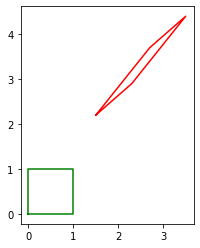

In [4]:
# Question 4
a, b, c, d = [0, 0, 1], [0, 1, 1], [1,1,1], [1,0,1]
X = np.array([a,b,c,d]).T

theta = np.pi*30/180
s = 1
tx, ty = 1.5, 2.2
# H = np.array([[s*np.cos(theta), -s*np.sin(theta), tx], [s*np.sin(theta), s*np.cos(theta), ty], [0,0,1]])
# Y = H @ X

a11, a12, a21, a22 = 0.8, 1.2, 0.7, 1.5 #Should be a non-singular matrix here
A = np.array([[a11,a12,tx], [a21, a22, ty], [0,0,1]])
Y = A @ X

x = np.append(X[0, :], X[0, 0])
y = np.append(X[1, :], X[1, 0])
fig, ax = plt.subplots(1,1)
ax.plot(x, y, color='g')
ax.set_aspect('equal')

x = np.append(Y[0, :], Y[0, 0])
y = np.append(Y[1, :], Y[1, 0])
ax.plot(x, y, color='r')
ax.set_aspect('equal')
plt.show()

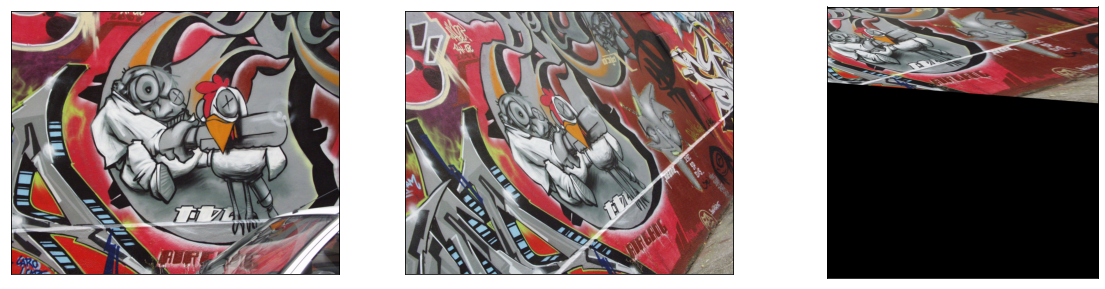

In [2]:
# Question 5
import cv2 as cv
import numpy as np

im1=cv.imread(r'.\Images\grafi\img1.ppm', cv.IMREAD_ANYCOLOR)
im4=cv.imread(r'.\Images\grafi\img4.ppm', cv.IMREAD_ANYCOLOR)

#H=np.array([[ 6.63785e-01, 6.80334e-01, -3.1230335e+01],[-1.4495500e-01, 9.7128304e-01,1.4877420e+02],[4.2518504e-04, -1.3930359e-05, 1.000000000e+00]])
H=[]
with open(r'.\Images\grafi\H1to5p') as f:
    H=np.array([[float(h) for h in line.split()] for line in f])
im1to4 = cv.warpPerspective(im4,np.linalg.inv(H),(2000,2000))

fig, ax = plt.subplots(1,3,figsize =(20,5))
ax[0].imshow(cv.cvtColor(im1, cv.COLOR_BGR2RGB))
ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].imshow(cv.cvtColor(im4, cv.COLOR_BGR2RGB))
ax[1].set_xticks([]), ax[1].set_yticks([])
ax[2].imshow(cv.cvtColor(im1to4, cv.COLOR_BGR2RGB))
ax[2].set_xticks([]), ax[2].set_yticks([])
plt.show()